<a href="https://colab.research.google.com/github/achyuth098/Disease-risk-Asssesment/blob/main/data_analysis_for_MRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------
# Adjust these paths to match your local setup
# ---------------------------------------
DATA_PATH = "data"  # e.g., "./data" or absolute path
patients_file = os.path.join(DATA_PATH, "/content/patients.csv")
conditions_file = os.path.join(DATA_PATH, "/content/conditions.csv")
encounters_file = os.path.join(DATA_PATH, "/content/encounters.csv")
medications_file = os.path.join(DATA_PATH, "/content/medications.csv")
observations_file = os.path.join(DATA_PATH, "/content/observations.csv")
procedures_file = os.path.join(DATA_PATH, "/content/procedures.csv")

# ---------------------------------------
# Read in each CSV file
# ---------------------------------------
df_patients = pd.read_csv(patients_file)
df_conditions = pd.read_csv(conditions_file)
df_encounters = pd.read_csv(encounters_file)
df_medications = pd.read_csv(medications_file)
df_observations = pd.read_csv(observations_file)
df_procedures = pd.read_csv(procedures_file)

print("Data Loaded Successfully!")
print(f"Patients: {df_patients.shape}")
print(f"Conditions: {df_conditions.shape}")
print(f"Encounters: {df_encounters.shape}")
print(f"Medications: {df_medications.shape}")
print(f"Observations: {df_observations.shape}")
print(f"Procedures: {df_procedures.shape}")


Data Loaded Successfully!
Patients: (10000, 28)
Conditions: (369526, 7)
Encounters: (569069, 15)
Medications: (491689, 13)
Observations: (1577986, 9)
Procedures: (1264864, 10)


In [ ]:
# ---------------------------------------
# Convert date columns to datetime
# ---------------------------------------
def convert_to_datetime(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

# Example sets of date columns (adjust as needed)
convert_to_datetime(df_patients, ['BIRTHDATE', 'DEATHDATE'])
convert_to_datetime(df_conditions, ['START', 'STOP'])
convert_to_datetime(df_encounters, ['START', 'STOP'])
convert_to_datetime(df_medications, ['START', 'STOP'])
convert_to_datetime(df_observations, ['DATE'])  # often 'DATE' in Synthea
convert_to_datetime(df_procedures, ['START', 'STOP'])

# ---------------------------------------
# Check for duplicates
# ---------------------------------------
df_patients.drop_duplicates(subset=['Id'], inplace=True)
df_conditions.drop_duplicates(inplace=True)
df_encounters.drop_duplicates(inplace=True)
df_medications.drop_duplicates(inplace=True)
df_observations.drop_duplicates(inplace=True)
df_procedures.drop_duplicates(inplace=True)

# ---------------------------------------
# Quick Missing Value Overview
# ---------------------------------------
print("\n--- Missing Values Overview ---")
print("Patients:", df_patients.isnull().sum())
print("Conditions:", df_conditions.isnull().sum())
print("Encounters:", df_encounters.isnull().sum())
print("Medications:", df_medications.isnull().sum())
print("Observations:", df_observations.isnull().sum())
print("Procedures:", df_procedures.isnull().sum())

# ---------------------------------------
# Example Integrity Check
# Ensure conditions reference a valid patient in df_patients
# ---------------------------------------
invalid_patients_in_conditions = ~df_conditions['PATIENT'].isin(df_patients['Id'])
if invalid_patients_in_conditions.any():
    count_invalid = invalid_patients_in_conditions.sum()
    print(f"\nWarning: {count_invalid} condition rows reference non-existent patients.")
else:
    print("\nAll condition records reference valid patients (based on 'PATIENT' col).")



--- Missing Values Overview ---
Patients: Id                         0
BIRTHDATE                  0
DEATHDATE              10000
SSN                        0
DRIVERS                 1796
PASSPORT                2359
PREFIX                  2083
FIRST                      0
MIDDLE                  1980
LAST                       0
SUFFIX                  9896
MAIDEN                  7322
MARITAL                 3517
RACE                       0
ETHNICITY                  0
GENDER                     0
BIRTHPLACE                 0
ADDRESS                    0
CITY                       0
STATE                      0
COUNTY                     0
FIPS                    2535
ZIP                        0
LAT                        0
LON                        0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
INCOME                     0
dtype: int64
Conditions: START              0
STOP           90132
PATIENT            0
ENCOUNTER          0
SYSTEM             0
CODE           


PATIENTS DATA EXPLORATION

--- df_patients.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   10000 non-null  object        
 1   BIRTHDATE            10000 non-null  datetime64[ns]
 2   DEATHDATE            0 non-null      datetime64[ns]
 3   SSN                  10000 non-null  object        
 4   DRIVERS              8204 non-null   object        
 5   PASSPORT             7641 non-null   object        
 6   PREFIX               7917 non-null   object        
 7   FIRST                10000 non-null  object        
 8   MIDDLE               8020 non-null   object        
 9   LAST                 10000 non-null  object        
 10  SUFFIX               104 non-null    object        
 11  MAIDEN               2678 non-null   object        
 12  MARITAL              6483 non-null

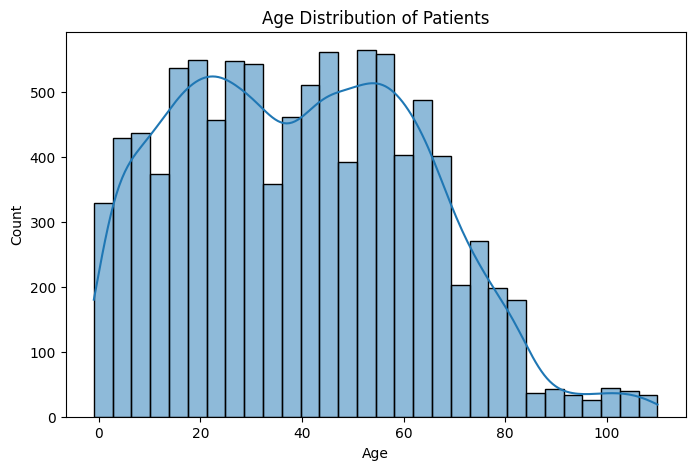


CONDITIONS DATA EXPLORATION

--- df_conditions.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369526 entries, 0 to 369525
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   START        369526 non-null  datetime64[ns]
 1   STOP         279394 non-null  datetime64[ns]
 2   PATIENT      369526 non-null  object        
 3   ENCOUNTER    369526 non-null  object        
 4   SYSTEM       369526 non-null  object        
 5   CODE         369526 non-null  int64         
 6   DESCRIPTION  369526 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 19.7+ MB
None

--- df_conditions.describe(include='all') ---
                                START                           STOP  \
count                          369526                         279394   
unique                            NaN                            NaN   
top                               NaN      

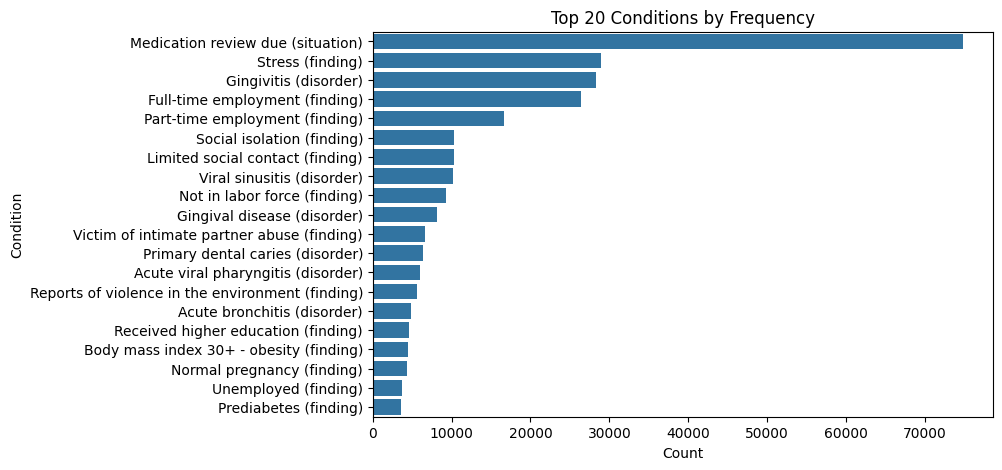

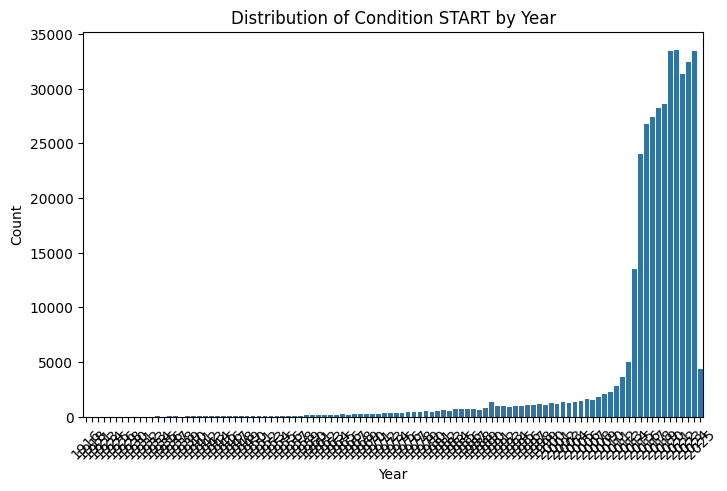

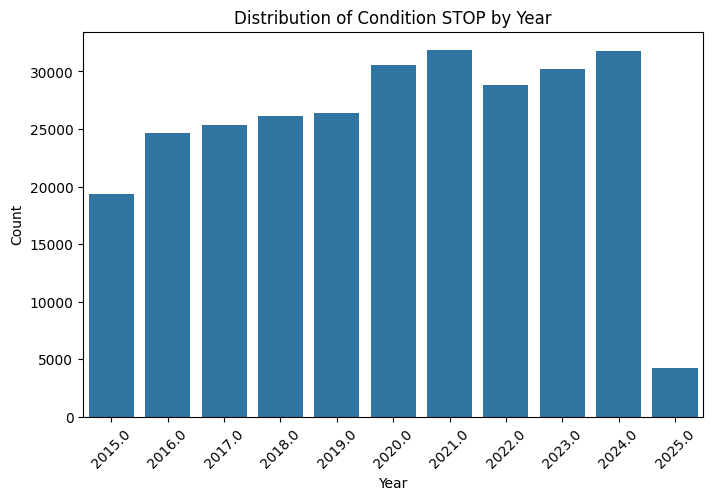


ENCOUNTERS DATA EXPLORATION

--- df_encounters.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569069 entries, 0 to 569068
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Id                   569069 non-null  object             
 1   START                569069 non-null  datetime64[ns, UTC]
 2   STOP                 569069 non-null  datetime64[ns, UTC]
 3   PATIENT              569069 non-null  object             
 4   ORGANIZATION         569069 non-null  object             
 5   PROVIDER             569069 non-null  object             
 6   PAYER                569069 non-null  object             
 7   ENCOUNTERCLASS       569069 non-null  object             
 8   CODE                 569069 non-null  int64              
 9   DESCRIPTION          569069 non-null  object             
 10  BASE_ENCOUNTER_COST  569069 non-null  float64            
 11  TOTAL_

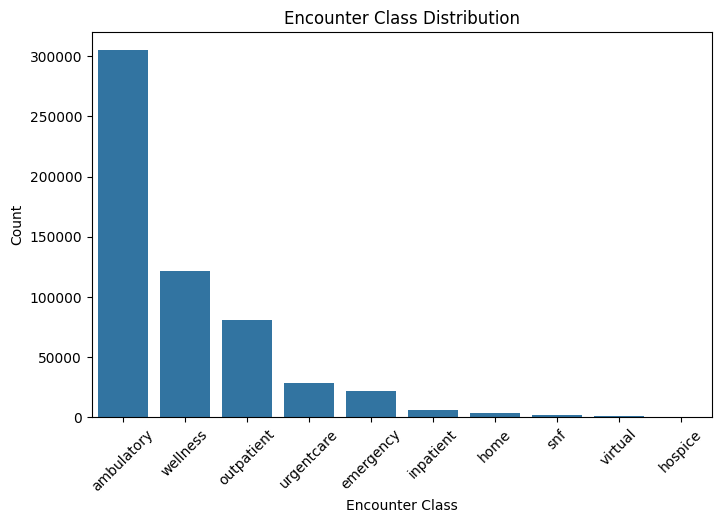

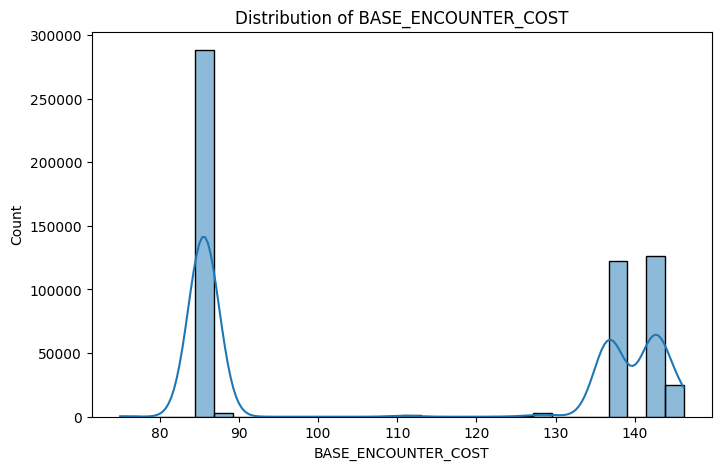

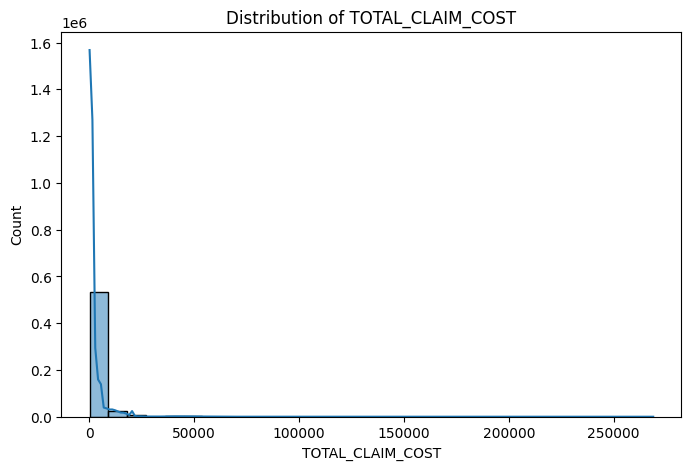

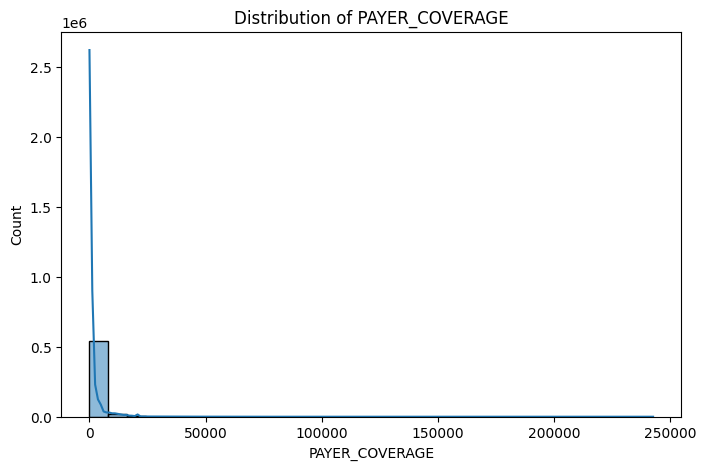


MEDICATIONS DATA EXPLORATION

--- df_medications.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491689 entries, 0 to 491688
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   START              491689 non-null  datetime64[ns, UTC]
 1   STOP               465031 non-null  datetime64[ns, UTC]
 2   PATIENT            491689 non-null  object             
 3   PAYER              491689 non-null  object             
 4   ENCOUNTER          491689 non-null  object             
 5   CODE               491689 non-null  int64              
 6   DESCRIPTION        491689 non-null  object             
 7   BASE_COST          491689 non-null  float64            
 8   PAYER_COVERAGE     491689 non-null  float64            
 9   DISPENSES          491689 non-null  int64              
 10  TOTALCOST          491689 non-null  float64            
 11  REASONCODE         397022 non-

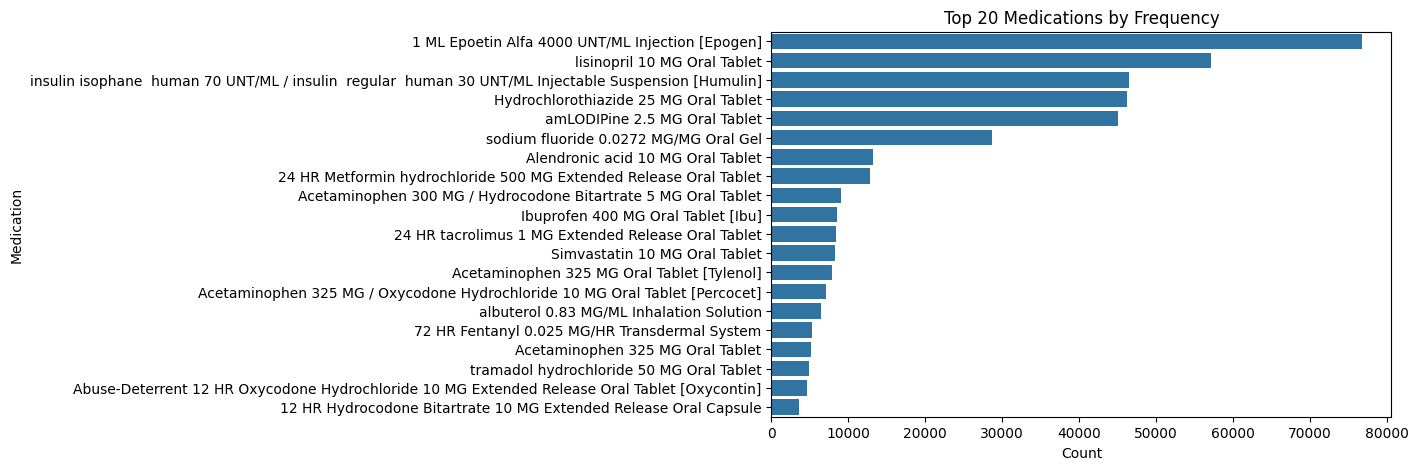

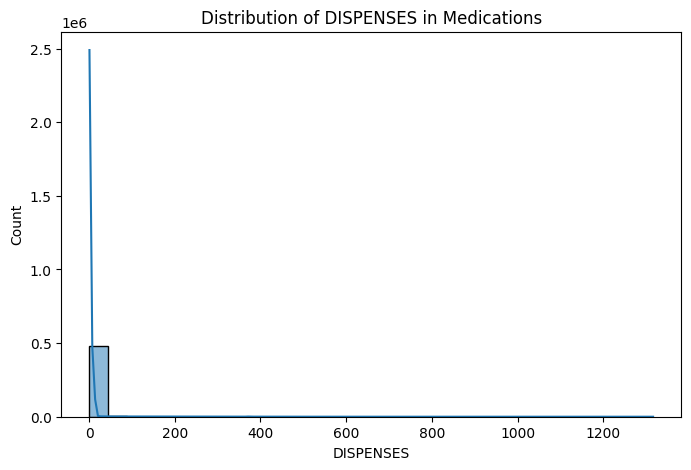


OBSERVATIONS DATA EXPLORATION

--- df_observations.info() ---
<class 'pandas.core.frame.DataFrame'>
Index: 1577695 entries, 0 to 1577985
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype              
---  ------            --------------    -----              
 0   DATE              1577695 non-null  datetime64[ns, UTC]
 1   PATIENT           1577695 non-null  object             
 2   ENCOUNTER         1518310 non-null  object             
 3   CATEGORY          1518309 non-null  object             
 4   CODE              1577694 non-null  object             
 5   DESCRIPTION       1577694 non-null  object             
 6   VALUE             1577694 non-null  object             
 7   UNITS             1138435 non-null  object             
 8   TYPE              1577694 non-null  object             
 9   orphan_encounter  1577695 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), object(8)
memory usage: 121.9+ MB
None

--- df_observati

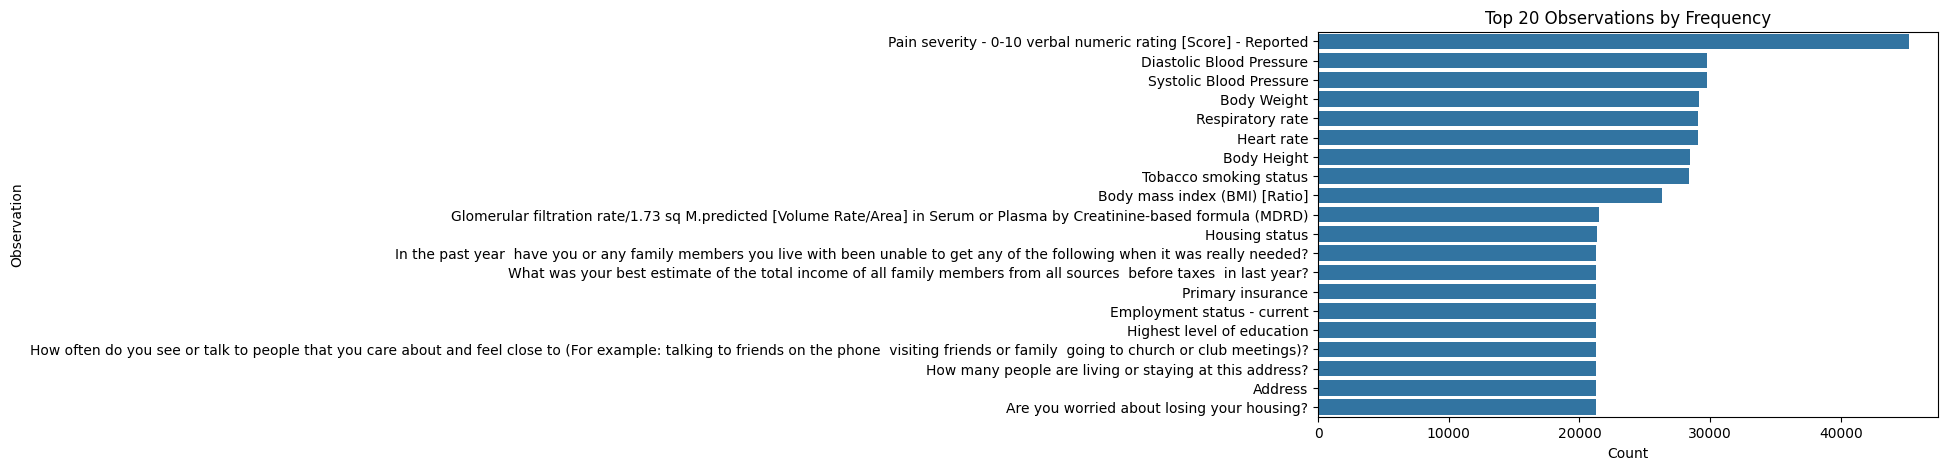

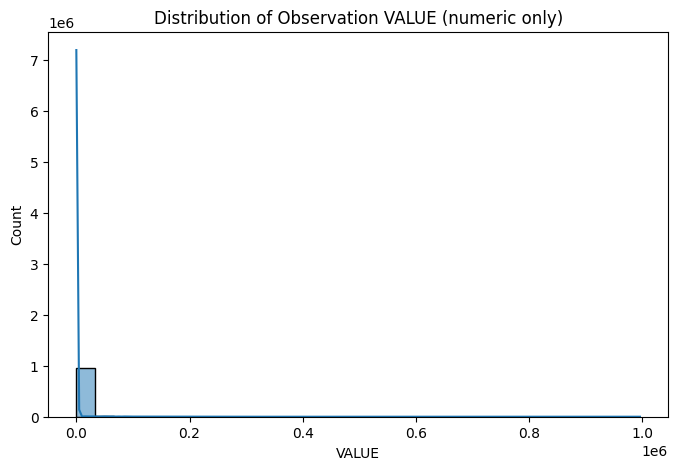


PROCEDURES DATA EXPLORATION

--- df_procedures.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264864 entries, 0 to 1264863
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   START              1264864 non-null  datetime64[ns, UTC]
 1   STOP               1264864 non-null  datetime64[ns, UTC]
 2   PATIENT            1264864 non-null  object             
 3   ENCOUNTER          1264864 non-null  object             
 4   SYSTEM             1264863 non-null  object             
 5   CODE               1264863 non-null  float64            
 6   DESCRIPTION        1264863 non-null  object             
 7   BASE_COST          1264863 non-null  float64            
 8   REASONCODE         593233 non-null   float64            
 9   REASONDESCRIPTION  593233 non-null   object             
 10  orphan_encounter   1264864 non-null  bool               
dtypes: bool(1), datet

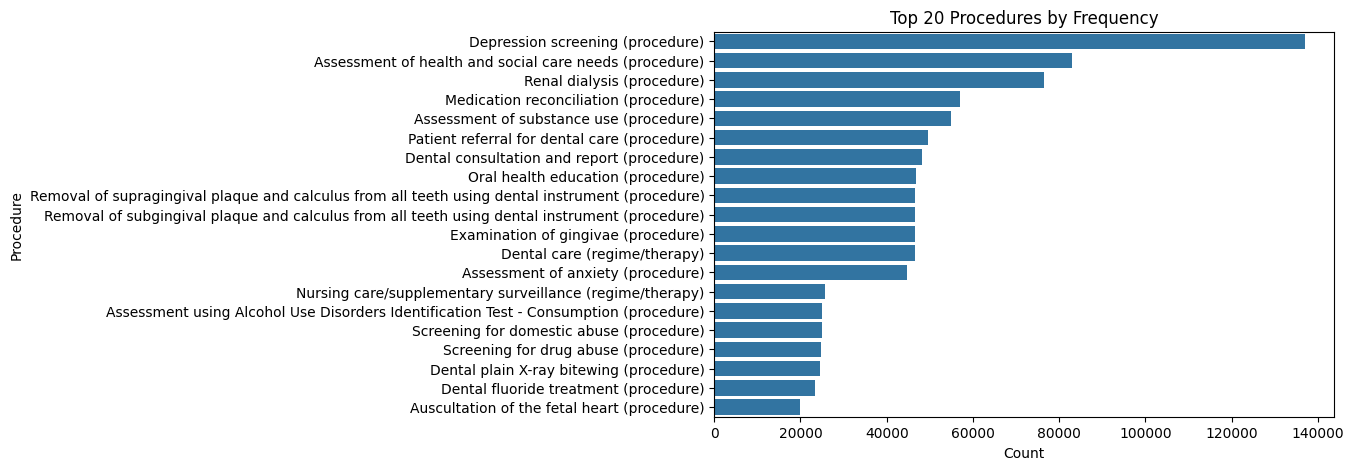


EDA COMPLETE.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures plots show up in Jupyter notebooks; remove if using .py scripts
# %matplotlib inline

##############################################
# 1. EDA for Patients
##############################################

print("\n======================")
print("PATIENTS DATA EXPLORATION")
print("======================")

# Overview of DataFrame structure
print("\n--- df_patients.info() ---")
print(df_patients.info())

# Descriptive statistics (numeric & object columns)
print("\n--- df_patients.describe(include='all') ---")
print(df_patients.describe(include='all'))

# Create an Age column if BIRTHDATE is present
if 'BIRTHDATE' in df_patients.columns:
    reference_date = pd.to_datetime("2025-01-01")
    df_patients['Age'] = (reference_date - pd.to_datetime(df_patients['BIRTHDATE'], errors='coerce')).dt.days // 365

# Display distribution of Age (if it exists)
if 'Age' in df_patients.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df_patients['Age'].dropna(), bins=30, kde=True)
    plt.title('Age Distribution of Patients')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

# Possible numeric columns in patients: Healthcare_Expenses, Healthcare_Coverage, Income
numeric_cols_patients = []
for col in ['Healthcare_Expenses', 'Healthcare_Coverage', 'Income']:
    if col in df_patients.columns:
        numeric_cols_patients.append(col)

if numeric_cols_patients:
    plt.figure(figsize=(10,5))
    df_patients[numeric_cols_patients].hist(bins=30, layout=(1, len(numeric_cols_patients)), figsize=(6*len(numeric_cols_patients), 4))
    plt.suptitle('Distributions of Numeric Columns in Patients')
    plt.tight_layout()
    plt.show()

##############################################
# 2. EDA for Conditions
##############################################

print("\n======================")
print("CONDITIONS DATA EXPLORATION")
print("======================")

# Overview of conditions
print("\n--- df_conditions.info() ---")
print(df_conditions.info())

print("\n--- df_conditions.describe(include='all') ---")
print(df_conditions.describe(include='all'))

# Top 20 most frequent conditions
if 'DESCRIPTION' in df_conditions.columns:
    top_20_conditions = df_conditions['DESCRIPTION'].value_counts().head(20)
    print("\n--- Top 20 Conditions ---")
    print(top_20_conditions)

    # Bar plot of top 20 conditions
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_20_conditions.values, y=top_20_conditions.index)
    plt.title('Top 20 Conditions by Frequency')
    plt.xlabel('Count')
    plt.ylabel('Condition')
    plt.show()

# Checking distribution of START, STOP if they are datetime
for col in ['START', 'STOP']:
    if col in df_conditions.columns and pd.api.types.is_datetime64_any_dtype(df_conditions[col]):
        # Plot how many conditions started or stopped by year (example)
        df_conditions['year_' + col] = df_conditions[col].dt.year
        # Quick bar chart
        year_counts = df_conditions['year_' + col].value_counts().sort_index()
        plt.figure(figsize=(8,5))
        sns.barplot(x=year_counts.index.astype(str), y=year_counts.values)
        plt.title(f'Distribution of Condition {col} by Year')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

##############################################
# 3. EDA for Encounters
##############################################

print("\n======================")
print("ENCOUNTERS DATA EXPLORATION")
print("======================")

# Overview of encounters
print("\n--- df_encounters.info() ---")
print(df_encounters.info())

print("\n--- df_encounters.describe(include='all') ---")
print(df_encounters.describe(include='all'))

# Possible columns: ENCOUNTERCLASS, CODE, DESCRIPTION, BASE_ENCOUNTER_COST, etc.
if 'ENCOUNTERCLASS' in df_encounters.columns:
    encounterclass_counts = df_encounters['ENCOUNTERCLASS'].value_counts()
    print("\n--- Encounter Class Distribution ---")
    print(encounterclass_counts)

    # Bar plot
    plt.figure(figsize=(8,5))
    sns.barplot(x=encounterclass_counts.index, y=encounterclass_counts.values)
    plt.title('Encounter Class Distribution')
    plt.xlabel('Encounter Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Cost distribution (if columns exist)
cost_cols = ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE']
for cost_col in cost_cols:
    if cost_col in df_encounters.columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df_encounters[cost_col].dropna(), bins=30, kde=True)
        plt.title(f'Distribution of {cost_col}')
        plt.xlabel(cost_col)
        plt.ylabel('Count')
        plt.show()

##############################################
# 4. EDA for Medications
##############################################

print("\n======================")
print("MEDICATIONS DATA EXPLORATION")
print("======================")

# Overview
print("\n--- df_medications.info() ---")
print(df_medications.info())

print("\n--- df_medications.describe(include='all') ---")
print(df_medications.describe(include='all'))

# Top 20 medication descriptions
if 'DESCRIPTION' in df_medications.columns:
    top_20_meds = df_medications['DESCRIPTION'].value_counts().head(20)
    print("\n--- Top 20 Medications ---")
    print(top_20_meds)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_20_meds.values, y=top_20_meds.index)
    plt.title('Top 20 Medications by Frequency')
    plt.xlabel('Count')
    plt.ylabel('Medication')
    plt.show()

# Dispenses distribution if present
if 'DISPENSES' in df_medications.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df_medications['DISPENSES'].dropna(), bins=30, kde=True)
    plt.title('Distribution of DISPENSES in Medications')
    plt.xlabel('DISPENSES')
    plt.ylabel('Count')
    plt.show()

##############################################
# 5. EDA for Observations
##############################################

print("\n======================")
print("OBSERVATIONS DATA EXPLORATION")
print("======================")

print("\n--- df_observations.info() ---")
print(df_observations.info())

print("\n--- df_observations.describe(include='all') ---")
print(df_observations.describe(include='all'))

if 'DESCRIPTION' in df_observations.columns:
    top_20_obs = df_observations['DESCRIPTION'].value_counts().head(20)
    print("\n--- Top 20 Observations ---")
    print(top_20_obs)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_20_obs.values, y=top_20_obs.index)
    plt.title('Top 20 Observations by Frequency')
    plt.xlabel('Count')
    plt.ylabel('Observation')
    plt.show()

# Observations may have a numeric 'VALUE' column
if 'VALUE' in df_observations.columns:
    # Check if 'VALUE' can be numeric
    # Some are purely numeric, some are strings. Try converting:
    df_observations['VALUE_num'] = pd.to_numeric(df_observations['VALUE'], errors='coerce')
    num_values = df_observations['VALUE_num'].dropna()
    if len(num_values) > 0:
        plt.figure(figsize=(8,5))
        sns.histplot(num_values, bins=30, kde=True)
        plt.title('Distribution of Observation VALUE (numeric only)')
        plt.xlabel('VALUE')
        plt.ylabel('Count')
        plt.show()

##############################################
# 6. EDA for Procedures
##############################################

print("\n======================")
print("PROCEDURES DATA EXPLORATION")
print("======================")

print("\n--- df_procedures.info() ---")
print(df_procedures.info())

print("\n--- df_procedures.describe(include='all') ---")
print(df_procedures.describe(include='all'))

if 'DESCRIPTION' in df_procedures.columns:
    top_20_procedures = df_procedures['DESCRIPTION'].value_counts().head(20)
    print("\n--- Top 20 Procedures ---")
    print(top_20_procedures)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_20_procedures.values, y=top_20_procedures.index)
    plt.title('Top 20 Procedures by Frequency')
    plt.xlabel('Count')
    plt.ylabel('Procedure')
    plt.show()

##############################################
# 7. Potential Correlations / Cross-Table
##############################################
# Example of numeric correlations in patients

if 'Age' in df_patients.columns:
    num_cols_for_corr = ['Age']
    for col in ['Healthcare_Expenses', 'Healthcare_Coverage', 'Income']:
        if col in df_patients.columns:
            num_cols_for_corr.append(col)

    if len(num_cols_for_corr) > 1:
        corr_mat = df_patients[num_cols_for_corr].corr()
        print("\n--- Correlation Matrix (Patients) ---")
        print(corr_mat)

        plt.figure(figsize=(6,5))
        sns.heatmap(corr_mat, annot=True, cmap="Blues", fmt=".2f")
        plt.title("Correlation Heatmap - Patients")
        plt.show()

print("\nEDA COMPLETE.")


In [ ]:
def check_foreign_key(df_source, source_col, df_target, target_col, source_name, target_name):
    """
    Checks if the values in df_source[source_col] all exist in df_target[target_col].
    Prints a warning if any references are missing.

    :param df_source: The source DataFrame that holds the foreign key column.
    :param source_col: The name of the foreign key column in the source DataFrame.
    :param df_target: The target DataFrame that holds the primary key column.
    :param target_col: The name of the primary key column in the target DataFrame.
    :param source_name: A string identifying the source table (for logging).
    :param target_name: A string identifying the target table (for logging).
    """
    # Ensure source_col & target_col exist in the respective dataframes
    if source_col not in df_source.columns:
        print(f"Note: {source_name}.{source_col} column not found. Skipping check.")
        return
    if target_col not in df_target.columns:
        print(f"Note: {target_name}.{target_col} column not found. Skipping check.")
        return

    missing_mask = ~df_source[source_col].isin(df_target[target_col])
    missing_count = missing_mask.sum()

    if missing_count > 0:
        print(f"WARNING: {missing_count} rows in {source_name}.{source_col} reference "
              f"non-existent {target_name}.{target_col}.")
    else:
        print(f"All {source_name}.{source_col} references are valid in {target_name}.{target_col}.")


In [ ]:
# Adjust variable names if your DataFrame objects differ
# For example, if you have dfConditions instead of df_conditions, rename accordingly.

check_foreign_key(
    df_source=df_conditions,
    source_col="PATIENT",
    df_target=df_patients,
    target_col="Id",
    source_name="conditions",
    target_name="patients"
)

check_foreign_key(
    df_source=df_conditions,
    source_col="ENCOUNTER",
    df_target=df_encounters,
    target_col="Id",
    source_name="conditions",
    target_name="encounters"
)

check_foreign_key(
    df_source=df_encounters,
    source_col="PATIENT",
    df_target=df_patients,
    target_col="Id",
    source_name="encounters",
    target_name="patients"
)

check_foreign_key(
    df_source=df_medications,
    source_col="PATIENT",
    df_target=df_patients,
    target_col="Id",
    source_name="medications",
    target_name="patients"
)

check_foreign_key(
    df_source=df_medications,
    source_col="ENCOUNTER",
    df_target=df_encounters,
    target_col="Id",
    source_name="medications",
    target_name="encounters"
)

check_foreign_key(
    df_source=df_observations,
    source_col="PATIENT",
    df_target=df_patients,
    target_col="Id",
    source_name="observations",
    target_name="patients"
)

check_foreign_key(
    df_source=df_observations,
    source_col="ENCOUNTER",
    df_target=df_encounters,
    target_col="Id",
    source_name="observations",
    target_name="encounters"
)

check_foreign_key(
    df_source=df_procedures,
    source_col="PATIENT",
    df_target=df_patients,
    target_col="Id",
    source_name="procedures",
    target_name="patients"
)

check_foreign_key(
    df_source=df_procedures,
    source_col="ENCOUNTER",
    df_target=df_encounters,
    target_col="Id",
    source_name="procedures",
    target_name="encounters"
)


All conditions.PATIENT references are valid in patients.Id.
All conditions.ENCOUNTER references are valid in encounters.Id.
All encounters.PATIENT references are valid in patients.Id.
All medications.PATIENT references are valid in patients.Id.
All medications.ENCOUNTER references are valid in encounters.Id.
All observations.PATIENT references are valid in patients.Id.
All procedures.PATIENT references are valid in patients.Id.


In [ ]:
# Identify which observation rows reference invalid encounters
invalid_obs_mask = ~df_observations['ENCOUNTER'].isin(df_encounters['Id'])
df_observations['orphan_encounter'] = invalid_obs_mask  # True if invalid

# Identify which procedure rows reference invalid encounters
invalid_proc_mask = ~df_procedures['ENCOUNTER'].isin(df_encounters['Id'])
df_procedures['orphan_encounter'] = invalid_proc_mask  # True if invalid

# Count how many were flagged
print(f"Flagged orphaned observations: {df_observations['orphan_encounter'].sum()}")
print(f"Flagged orphaned procedures: {df_procedures['orphan_encounter'].sum()}")


Flagged orphaned observations: 59385
Flagged orphaned procedures: 1


In [ ]:
# Create a dictionary to map condition descriptions to diseases
condition_map = {
    # Diabetes
    "Diabetes mellitus type 2 (disorder)": "Diabetes",
    "Prediabetes (finding)": "Diabetes",
    "Hyperglycemia (disorder)": "Diabetes",
    "Metabolic syndrome X (disorder)": "Diabetes",
    "Microalbuminuria due to type 2 diabetes mellitus (disorder)": "Diabetes",
    "Neuropathy due to type 2 diabetes mellitus (disorder)": "Diabetes",
    "Retinopathy due to type 2 diabetes mellitus (disorder)": "Diabetes",
    "Nonproliferative retinopathy due to type 2 diabetes mellitus (disorder)": "Diabetes",
    "Proliferative retinopathy due to type 2 diabetes mellitus (disorder)": "Diabetes",
    "Proteinuria due to type 2 diabetes mellitus (disorder)": "Diabetes",
    "Macular edema and retinopathy due to type 2 diabetes mellitus (disorder)": "Diabetes",

    # Heart Disease
    "Ischemic heart disease (disorder)": "Heart Disease",
    "Abnormal findings diagnostic imaging heart+coronary circulat (finding)": "Heart Disease",
    "History of coronary artery bypass grafting (situation)": "Heart Disease",
    "Essential hypertension (disorder)": "Heart Disease",
    "Hypertriglyceridemia (disorder)": "Heart Disease",
    "Hyperlipidemia (disorder)": "Heart Disease",
    "Myocardial infarction (disorder)": "Heart Disease",
    "Acute ST segment elevation myocardial infarction (disorder)": "Heart Disease",
    "History of myocardial infarction (situation)": "Heart Disease",
    "Chronic congestive heart failure (disorder)": "Heart Disease",
    "Aortic valve regurgitation (disorder)": "Heart Disease",
    "Mitral valve regurgitation (disorder)": "Heart Disease",
    "Tricuspid valve regurgitation (disorder)": "Heart Disease",
    "Aortic valve stenosis (disorder)": "Heart Disease",
    "History of aortic valve replacement (situation)": "Heart Disease",
    "Cerebrovascular accident (disorder)": "Heart Disease",
    "Acute non-ST segment elevation myocardial infarction (disorder)": "Heart Disease",
    "Preinfarction syndrome (disorder)": "Heart Disease",
    "Atrial fibrillation (disorder)": "Heart Disease",
    "Acute pulmonary embolism (disorder)": "Heart Disease",

    # Lung Cancer
    "Suspected lung cancer (situation)": "Lung Cancer",
    "Non-small cell lung cancer (disorder)": "Lung Cancer",
    "Non-small cell carcinoma of lung, TNM stage 1 (disorder)": "Lung Cancer",
    "Small cell carcinoma of lung (disorder)": "Lung Cancer",
    "Primary small cell malignant neoplasm of lung, TNM stage 1 (disorder)": "Lung Cancer",

    # Breast Cancer
    "Malignant neoplasm of breast (disorder)": "Breast Cancer",

    # Kidney Disease
    "Chronic kidney disease stage 1 (disorder)": "Kidney Disease",
    "Chronic kidney disease stage 2 (disorder)": "Kidney Disease",
    "Chronic kidney disease stage 3 (disorder)": "Kidney Disease",
    "Chronic kidney disease stage 4 (disorder)": "Kidney Disease",
    "End-stage renal disease (disorder)": "Kidney Disease",
    "History of renal transplant (situation)": "Kidney Disease",
    "Awaiting transplantation of kidney (situation)": "Kidney Disease",
    "Kidney transplant failure and rejection (disorder)": "Kidney Disease",
    "Disorder of kidney due to diabetes mellitus (disorder)": "Kidney Disease",
}

# Apply mapping
df_conditions['DiseaseCategory'] = df_conditions['DESCRIPTION'].map(condition_map)

# Filter for the 5 diseases
df_conditions_filtered = df_conditions[df_conditions['DiseaseCategory'].notna()]


In [ ]:
# Create a copy for safety
df_conditions_mapped = df_conditions.copy()

# Map the DESCRIPTION to a DiseaseCategory
df_conditions_mapped['DiseaseCategory'] = df_conditions_mapped['DESCRIPTION'].map(condition_map)

# Filter for the 5 diseases (exclude None / NaN)
df_conditions_filtered = df_conditions_mapped[~df_conditions_mapped['DiseaseCategory'].isna()]
print("\n--- DiseaseCategory Value Counts ---")
print(df_conditions_filtered['DiseaseCategory'].value_counts())



--- DiseaseCategory Value Counts ---
DiseaseCategory
Heart Disease     9777
Diabetes          8447
Kidney Disease    5292
Breast Cancer      151
Lung Cancer         22
Name: count, dtype: int64


In [ ]:
# Extract the Patient IDs who have these 5 diseases
target_patient_ids = df_conditions_filtered['PATIENT'].unique()  # or 'Patient'

df_patients_filtered = df_patients[df_patients['Id'].isin(target_patient_ids)]
df_encounters_filtered = df_encounters[df_encounters['PATIENT'].isin(target_patient_ids)]
df_medications_filtered = df_medications[df_medications['PATIENT'].isin(target_patient_ids)]
df_observations_filtered = df_observations[df_observations['PATIENT'].isin(target_patient_ids)]
df_procedures_filtered = df_procedures[df_procedures['PATIENT'].isin(target_patient_ids)]

print("\n--- Filtered Data Sizes ---")
print(f"Patients with target diseases: {df_patients_filtered.shape[0]}")
print(f"Conditions for target diseases: {df_conditions_filtered.shape[0]}")
print(f"Encounters: {df_encounters_filtered.shape[0]}")
print(f"Medications: {df_medications_filtered.shape[0]}")
print(f"Observations: {df_observations_filtered.shape[0]}")
print(f"Procedures: {df_procedures_filtered.shape[0]}")



--- Filtered Data Sizes ---
Patients with target diseases: 5383
Conditions for target diseases: 23689
Encounters: 420658
Medications: 449233
Observations: 1357136
Procedures: 957776


From the filtered data sizes you posted, here’s what’s happening:

Patients with target diseases: 5383

Out of your total df_patients dataset, 5,383 patients were identified as having (at least) one of the five diseases (diabetes, heart disease, lung cancer, breast cancer, or kidney disease).
Conditions for target diseases: 23689

After filtering, you have 23,689 rows in df_conditions_filtered.
Each patient can have multiple conditions related to one or more of these five diseases (e.g., Type 2 diabetes plus diabetic retinopathy, or multiple heart-disease-related conditions).
Encounters: 420658

Even though only 5,383 patients remain, collectively, they have 420,658 encounters.
Patients with chronic diseases often have frequent visits over their simulated lifetime (in Synthea’s data).
Medications: 449233

Similarly, those 5,383 patients have 449,233 medication records.
Chronic disease patients tend to have repeated prescriptions, refills, or multiple medications.
Observations: 1357136

Observations often include vitals, lab results, or measurements taken during each encounter.
Each patient can have dozens or hundreds of observations over time, hence 1,357,136 rows.
Procedures: 957776

957,776 procedure records for 5,383 patients might seem high, but Synthea can simulate a wide variety of procedural events (surgeries, screenings, imaging, lab draws, etc.) that get recorded in “procedures” or related files.


**We want a concise DataFrame that shows which patient has which disease (some patients might have multiple diseases). This allows us to attach the disease label to any other table.**

In [ ]:
# Create a compact reference of patient + disease category
# Each (patient, disease) pair is unique
df_conditions_disease_only = (df_conditions_filtered[['PATIENT','DiseaseCategory']]
                              .drop_duplicates())

print("Unique (patient, disease) pairs:", df_conditions_disease_only.shape[0])
df_conditions_disease_only.head(5)


Unique (patient, disease) pairs: 9771


,PATIENT,DiseaseCategory
98,c2bc4e89-59fd-872d-011c-3c55515ff7ef,Diabetes
137,cc42ceaa-2eb3-be4b-21c2-fc35e38b8373,Diabetes
158,b195aa7c-cadb-5d7d-f353-70953b5a50e1,Diabetes
162,b195aa7c-cadb-5d7d-f353-70953b5a50e1,Heart Disease
248,48da4e28-a942-02a7-4e67-c408938c4161,Heart Disease


**Merge With Medications
We want to see which disease(s) each medication row is associated with. A single patient may have multiple diseases, so that means multiple medication rows for the same patient can map to multiple disease categories.**

In [ ]:
# Merge on the 'PATIENT' column
df_medications_merged = df_medications_filtered.merge(
    df_conditions_disease_only,
    how='left',            # or 'inner', depending on your preference
    left_on='PATIENT',
    right_on='PATIENT'
)

print("df_medications_merged shape:", df_medications_merged.shape)
df_medications_merged.head(5)


df_medications_merged shape: (1205385, 14)


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION,DiseaseCategory
0,2015-08-08 16:03:11+00:00,2016-08-02 16:03:11+00:00,c2bc4e89-59fd-872d-011c-3c55515ff7ef,df166300-5a78-3502-a46a-832842197811,bd5b00d2-b480-ae76-118d-6261255562b4,757594,Jolivette 28 Day Pack,229.32,179.32,12,2751.84,NaN,NaN,Diabetes
1,2016-05-31 17:46:16+00:00,2016-06-24 17:46:16+00:00,c2bc4e89-59fd-872d-011c-3c55515ff7ef,e03e23c9-4df1-3eb6-a62d-f70f02301496,faecffb8-bdf9-7c95-f685-fad89d965ab2,849574,Naproxen sodium 220 MG Oral Tablet,91.72,0.00,1,91.72,NaN,NaN,Diabetes
2,2016-08-02 16:03:11+00:00,2017-07-28 16:03:11+00:00,c2bc4e89-59fd-872d-011c-3c55515ff7ef,e03e23c9-4df1-3eb6-a62d-f70f02301496,7a133068-ba03-65db-5c33-69c68909e944,748879,Levora 0.15/30 28 Day Pack,229.32,0.00,12,2751.84,NaN,NaN,Diabetes
3,2017-05-15 17:46:16+00:00,2017-08-29 14:09:16+00:00,c2bc4e89-59fd-872d-011c-3c55515ff7ef,e03e23c9-4df1-3eb6-a62d-f70f02301496,7f64c7eb-0b64-3fb3-da88-9888bd461ade,313782,Acetaminophen 325 MG Oral Tablet,45.86,0.00,3,137.58,NaN,NaN,Diabetes
4,2017-05-22 21:09:16+00:00,2017-06-18 16:03:11+00:00,c2bc4e89-59fd-872d-011c-3c55515ff7ef,e03e23c9-4df1-3eb6-a62d-f70f02301496,1293a08a-09a7-f394-997c-59eff69dcf38,861467,Meperidine Hydrochloride 50 MG Oral Tablet,17.12,0.00,1,17.12,NaN,NaN,Diabetes


In [ ]:
# Example: Top medications by disease
med_counts = df_medications_merged.groupby('DiseaseCategory')['DESCRIPTION'].value_counts()
top_5_per_disease = med_counts.groupby(level=0).head(5)
print(top_5_per_disease)


DiseaseCategory  DESCRIPTION                                                                                          
Breast Cancer    lisinopril 10 MG Oral Tablet                                                                              2326
                 insulin isophane  human 70 UNT/ML / insulin  regular  human 30 UNT/ML Injectable Suspension [Humulin]     2193
                 amLODIPine 2.5 MG Oral Tablet                                                                             2143
                 Hydrochlorothiazide 25 MG Oral Tablet                                                                     1788
                 1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen]                                                          1772
Diabetes         1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen]                                                         76734
                 lisinopril 10 MG Oral Tablet                                                                    

**Merge With Encounters
Similarly, attach disease labels to each encounter row:**

In [ ]:
df_encounters_merged = df_encounters_filtered.merge(
    df_conditions_disease_only,
    how='left',
    on='PATIENT'
)

print("df_encounters_merged shape:", df_encounters_merged.shape)
df_encounters_merged.head(5)

# Example: Count number of encounters per disease
enc_counts = df_encounters_merged.groupby('DiseaseCategory').size()
print("\nEncounters per Disease:")
print(enc_counts)


df_encounters_merged shape: (996259, 16)

Encounters per Disease:
DiseaseCategory
Breast Cancer      19295
Diabetes          363053
Heart Disease     370647
Kidney Disease    240968
Lung Cancer         2296
dtype: int64


In [ ]:
df_procedures_merged = df_procedures_filtered.merge(
    df_conditions_disease_only,
    how='left',
    on='PATIENT'
)

print("df_procedures_merged shape:", df_procedures_merged.shape)
df_procedures_merged.head(5)

# Example: Top 5 procedures per disease
proc_counts = df_procedures_merged.groupby('DiseaseCategory')['DESCRIPTION'].value_counts()
top_5_procs_per_disease = proc_counts.groupby(level=0).head(5)
print("\nTop procedures per disease:\n", top_5_procs_per_disease)


df_procedures_merged shape: (2228685, 12)

Top procedures per disease:
 DiseaseCategory  DESCRIPTION                                            
Breast Cancer    Depression screening (procedure)                             4921
                 Assessment of health and social care needs (procedure)       3092
                 Assessment of substance use (procedure)                      1875
                 Medication reconciliation (procedure)                        1830
                 Renal dialysis (procedure)                                   1806
Diabetes         Depression screening (procedure)                            97448
                 Renal dialysis (procedure)                                  76430
                 Assessment of health and social care needs (procedure)      62035
                 Assessment of substance use (procedure)                     36871
                 Medication reconciliation (procedure)                       34964
Heart Disease    Depressi

It’s completely normal in Synthea for certain procedures (like depression screening, substance use assessment, or medication reconciliation) to appear across many diseases—even ones where you might not expect them in real life (e.g., dialysis for breast cancer patients). Synthea’s modules simulate holistic care scenarios, so various screenings and interventions can get added to a patient’s record regardless of their primary disease.

Below are possible reasons you see these procedures for multiple diseases:

1. Routine Screenings & Assessments Appear Everywhere
Depression Screening: Synthea often includes universal mental health checks. Patients with any chronic disease might get screened for depression or substance use.
Assessment of Health & Social Care Needs: Preventive or routine evaluations frequently appear in Synthea data for all patients, not just those with a specific condition.
2. Procedures from Other Health Conditions
Renal Dialysis showing up in Breast Cancer or Heart Disease patients can occur if a patient has multiple chronic conditions (e.g., both kidney disease and breast cancer).
If a single patient has Breast Cancer and Kidney Disease, that row will be categorized under both disease labels in a “one-to-many” merge.
3. Multimorbidity in Synthea
Synthea’s modules simulate patients with multiple comorbidities—it doesn’t limit each patient to exactly one disease.
When you merged disease categories into the procedures DataFrame, if a patient has both Diabetes and Heart Disease, all of that patient’s procedures will appear in rows labeled for each disease. That’s why something like dialysis might show up under multiple diseases.
4. Preventive Care & Standard Workflow in Synthea
By design, Synthea includes a wide array of preventive measures (e.g., depression screening, substance use assessment). Real-world EHR data might be more or less variable, but Synthea tries to simulate comprehensive healthcare interactions.
5. How to Narrow Down “Truly Relevant” Procedures?
If you only want disease-specific procedures, you could filter out “generic” screenings, or only keep procedures that explicitly match the disease in a coded sense (e.g., ICD or SNOMED codes specific to breast cancer). For example:

Look for procedure codes (SNOMED, CPT, etc.) that are directly related to the disease.
Filter out universal screenings or general procedures you don’t consider relevant.
If a patient has multiple diseases, you may want to count that procedure for the disease that specifically triggers it.
Practical Tips for Interpretation
Check if a patient truly has multiple diseases. If so, it’s normal to see dialysis (kidney disease) also labeled under “Heart Disease” if the same patient has both conditions.
Decide whether to keep or remove universal screenings from your disease-specific analysis.
They can inflate counts in ways that don’t reflect the disease’s “signature” procedures.
Use procedure codes (rather than descriptions alone) to identify more clinically specific actions, like mastectomy for breast cancer or coronary angioplasty for heart disease.
Key Takeaways
High frequencies of “depression screening” and “substance use assessment” are typical in Synthea’s simulated environment.
Renal dialysis might appear under multiple diseases if the same patient has kidney disease and something else.
If you want a tighter disease-procedure link, you’ll need to further filter by the procedure’s underlying codes or confirm that the patient truly has both conditions.
This is all part of Synthea’s multi-condition approach to synthetic data generation. It doesn’t perfectly match real-world single-disease cohorts, but it gives you holistic patient records to work with!

**Merge With Observations**



In [ ]:
df_observations_merged = df_observations_filtered.merge(
    df_conditions_disease_only,
    how='left',
    on='PATIENT'
)

print("df_observations_merged shape:", df_observations_merged.shape)
df_observations_merged.head(5)

# Example: Top 5 observation descriptions per disease
obs_counts = df_observations_merged.groupby('DiseaseCategory')['DESCRIPTION'].value_counts()
top_5_obs_per_disease = obs_counts.groupby(level=0).head(5)
print("\nTop observations per disease:\n", top_5_obs_per_disease)


df_observations_merged shape: (3487966, 12)

Top observations per disease:
 DiseaseCategory  DESCRIPTION                                                                                                            
Breast Cancer    Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum or Plasma by Creatinine-based formula (MDRD)     1080
                 Hemoglobin A1c/Hemoglobin.total in Blood                                                                                     834
                 Pain severity - 0-10 verbal numeric rating [Score] - Reported                                                                778
                 Calcium [Mass/volume] in Serum or Plasma                                                                                     768
                 Carbon dioxide  total [Moles/volume] in Serum or Plasma                                                                      768
Diabetes         Pain severity - 0-10 verbal numeric rati

In [ ]:
row_example = df_observations_merged.sample(1)
print(row_example.T)

                                                            2720952
DATE                                      2024-02-23 16:24:07+00:00
PATIENT                        2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3
ENCOUNTER                      58f84769-8b80-c6f8-269c-6a9192cafa67
CATEGORY                                                     survey
CODE                                                        55758-7
DESCRIPTION       Patient Health Questionnaire 2 item (PHQ-2) to...
VALUE                                                           1.0
UNITS                                                       {score}
TYPE                                                        numeric
orphan_encounter                                              False
VALUE_num                                                       1.0
DiseaseCategory                                            Diabetes


In [ ]:
patient_id = row_example['PATIENT'].iloc[0]  # Get the patient ID from the sample row
patient_diseases = df_conditions_filtered[df_conditions_filtered['PATIENT'] == patient_id]

print(patient_diseases[['PATIENT','DiseaseCategory','DESCRIPTION']])


                                    PATIENT DiseaseCategory  \
58818  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diabetes   
58820  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diabetes   
58824  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diabetes   
58825  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diabetes   
58826  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3   Heart Disease   
58827  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diabetes   
58831  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3   Heart Disease   
58832  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diabetes   
58833  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diabetes   
58841  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3  Kidney Disease   
58842  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3  Kidney Disease   
59030  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3   Heart Disease   
59031  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3   Heart Disease   
59172  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3  Kidney Disease   
59173  2209c4b9-1e4c-d7a1-6bb6-154a1e1727d3        Diab